In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1: Image Zooming

#### Write a program to zoom an image by 1.5 times along each axis using the following techniques discussed (work with RGB Images) in class:

#### Importing libraries


In [5]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
import numpy as np
import math
import cv2

#### 1. Nearest neighbor.

In [73]:
def Nearest_neighbor(scaling_factor,path):
  start = timer()
  img = np.array(Image.open(path))
  if img.shape[2]==4:
    img=np.delete(img,[3],axis=2)

  # scaling_factor=1.5
  zoomed_image = np.empty(shape=(math.floor(img.shape[0]*scaling_factor) ,math.floor(img.shape[1]*scaling_factor),3),dtype='int')

  for i in range(zoomed_image.shape[0]):
    for j in range(zoomed_image.shape[1]):
      zoomed_image[i,j,:]=img[round(i/scaling_factor),round(j/scaling_factor),:]

  end = timer()
  print("Time taken for zooming the image " +str(end - start)+" sec")
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
  ax[0].imshow(img)
  ax[1].imshow(zoomed_image)

Time taken for zooming the image 1.5953157069999975 sec


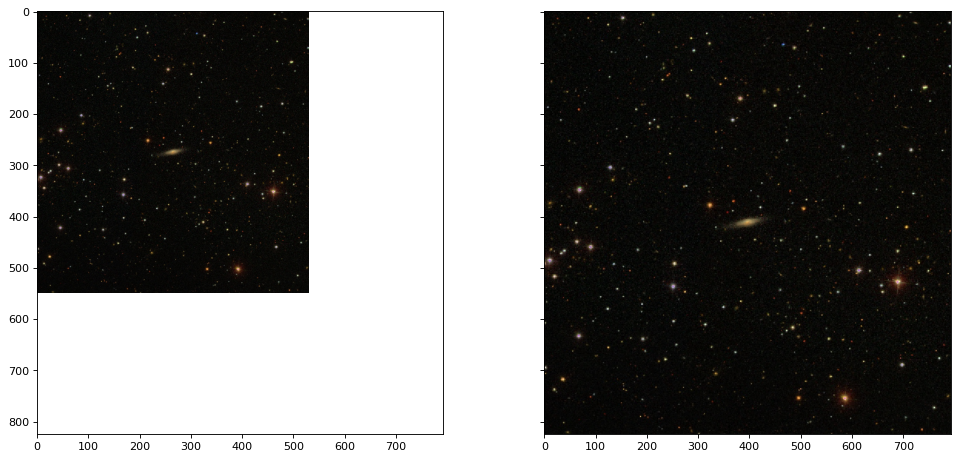

In [9]:
Nearest_neighbor(1.5,"/content/drive/MyDrive/s22022_hw1/x3Lkg.jpg")

Time taken for zooming the image 34.46513694499998 sec


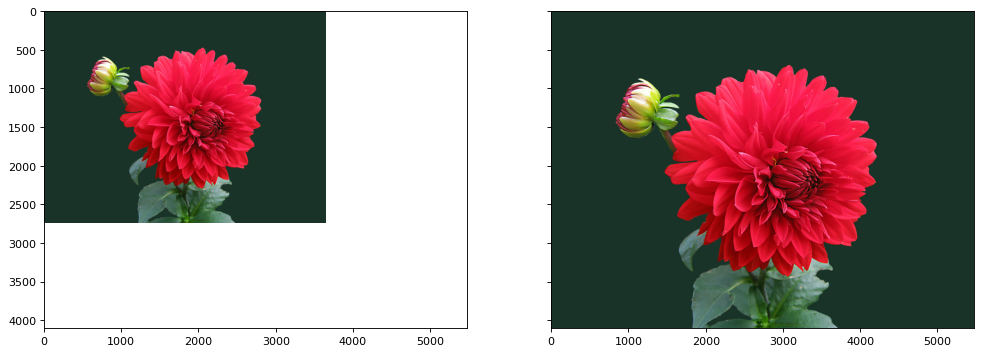

In [10]:
Nearest_neighbor(1.5,"/content/drive/MyDrive/s22022_hw1/Flower.jpg")

Time taken for zooming the image 0.6806469719999768 sec


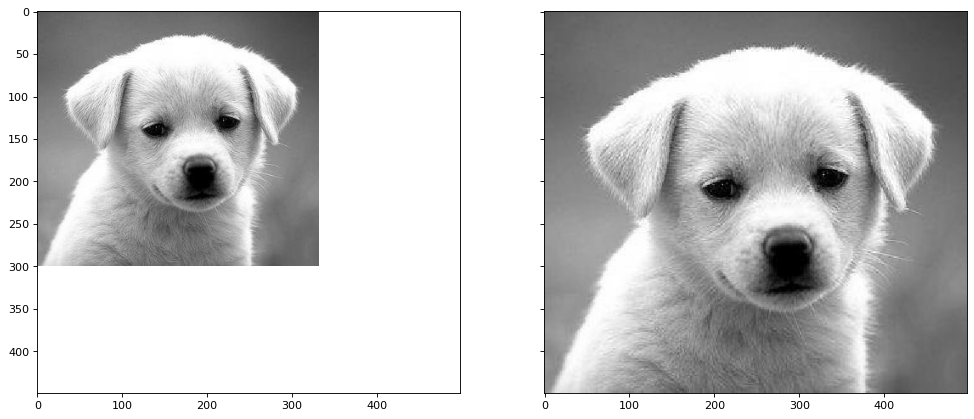

In [11]:
Nearest_neighbor(1.5,"/content/drive/MyDrive/s22022_hw1/Grey.jpg")

#### 2. Bilinear interpolation.

In [52]:
def Bilinear_interpolation(scaling_factor, path):
  start=timer()

  img = np.array(Image.open(path))

  if img.shape[2]==4:
    img=np.delete(img,[3],axis=2)

  #scaling_factor=1.5
  zoomed_image = np.zeros(shape=(math.ceil(img.shape[0]*scaling_factor) ,math.ceil(img.shape[1]*scaling_factor),3),dtype='int')

  for i in range(zoomed_image.shape[0]):
    for j in range(zoomed_image.shape[1]):
    
      x = i/scaling_factor
      y = j/scaling_factor

      x_floor = math.floor(x)
      x_ceil = min( img.shape[0]-1, math.ceil(x))
      y_floor = math.floor(y)
      y_ceil = min( img.shape[1]-1, math.ceil(y))
       
      
      if (x_ceil == x_floor) and (y_ceil == y_floor):
        q = img[int(x), int(y), :]
        
      elif (x_ceil == x_floor):
        q1 = img[int(x), int(y_floor), :]
        q2 = img[int(x), int(y_ceil), :]
        q = q1 * (y_ceil - y) + q2 * (y - y_floor)
      elif (y_ceil == y_floor):
        q1 = img[int(x_floor), int(y), :]
        q2 = img[int(x_ceil), int(y), :]
        q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
      else:
        v1 =img[x_floor, y_floor, :]
        v2 =img[x_ceil, y_floor, :]
        v3 =img[x_floor, y_ceil, :]
        v4 =img[x_ceil, y_ceil, :]

        q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
        q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
        q = q1 * (y_ceil - y) + q2 * (y - y_floor)
      
      zoomed_image[i,j,:] = q

  end=timer()
  print("Time taken for zooming the image " +str(end - start)+" sec")
  
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
  ax[0].imshow(img)
  ax[1].imshow(zoomed_image)



Time taken for zooming the image 5.737134238000181 sec


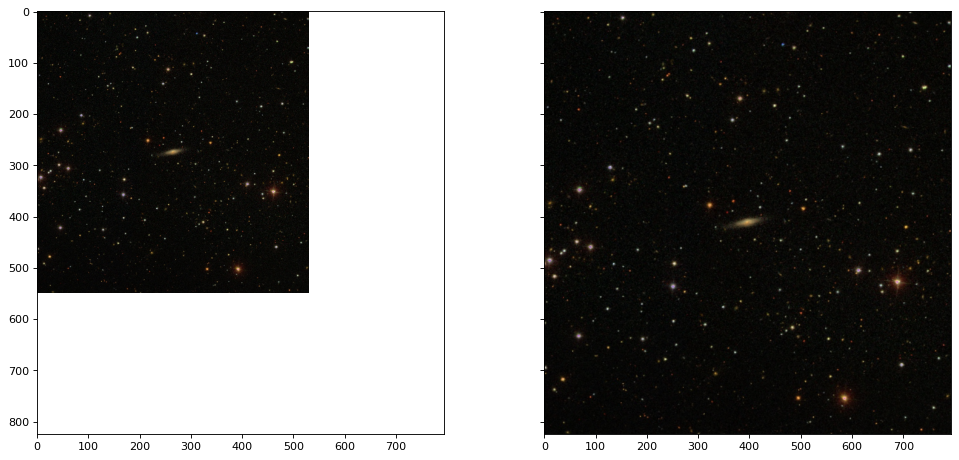

In [53]:
Bilinear_interpolation(1.5, "/content/drive/MyDrive/s22022_hw1/x3Lkg.jpg")

Time taken for zooming the image 236.42560005499945 sec


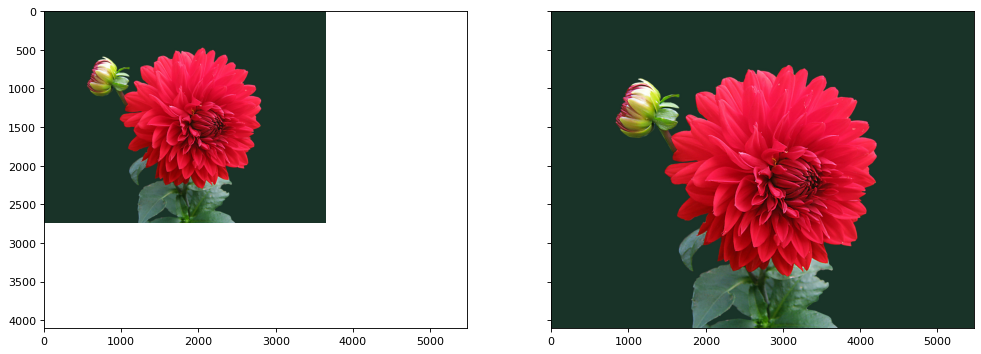

In [54]:
Bilinear_interpolation(1.5, "/content/drive/MyDrive/s22022_hw1/Flower.jpg")

Time taken for zooming the image 1.9639552660000845 sec


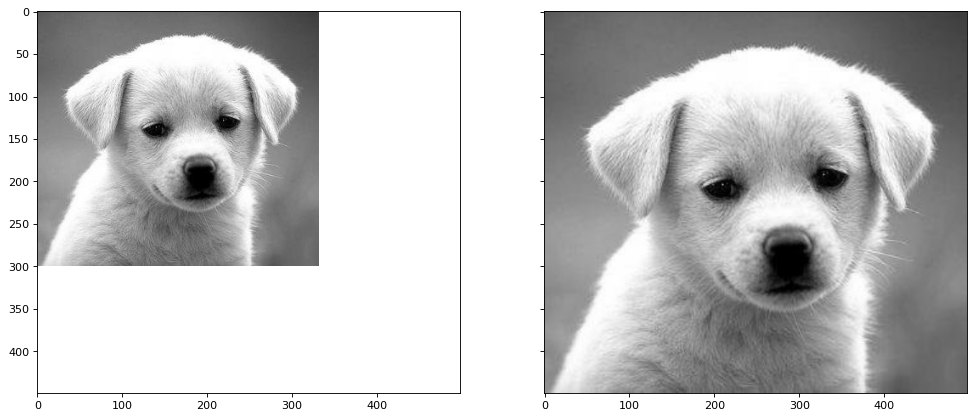

In [55]:
Bilinear_interpolation(1.5, "/content/drive/MyDrive/s22022_hw1/Grey.jpg")

# Problem 2: Histogram

#### 1. Write a function to compute the histogram of an image and plot the same. What is the modality of the histogram for the images mentioned above?

In [20]:
def Histogram(path):
  img = np.array(Image.open(path))
  print(img.shape)
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3), dpi=80, sharex=True, sharey=True)
  ax[0].hist(img[:,:,0].ravel(),256,[0,256],color='red')
  ax[1].hist(img[:,:,0].ravel(),256,[0,256],color='green')
  ax[2].hist(img[:,:,0].ravel(),256,[0,256],color='blue')
  plt.show()

(300, 332, 3)


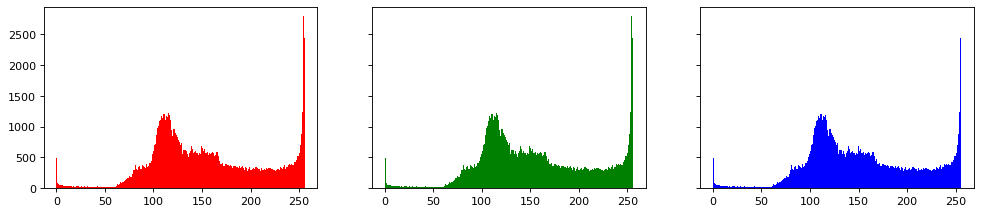

In [21]:
Histogram("/content/drive/MyDrive/s22022_hw1/Grey.jpg")

In [22]:
'''
Ans. 1.
Modality describes the number of peaks in a dataset. A unimodal distribution in a histogram means there is one 
distinct peak indicating the most frequent value in a histogram.
According to the above histogram  of the RGB image it is observed that the modality of the histogram is unimodal
''' 

'\nAns. 1.\nModality describes the number of peaks in a dataset. A unimodal distribution in a histogram means there is one \ndistinct peak indicating the most frequent value in a histogram.\nAccording to the above histogram  of the RGB image it is observed that the modality of the histogram is unimodal\n'

#### 2.What can you say about the histogram of a resulting image if we keep the MSB bits in the bitplane to 0? Plot and Observe?

In [65]:
def bitplane_MSB(path):
  img = cv2.imread(path,0)
  # img = np.array(Image.open(path))
  lst = []
  decimal=[]
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j] ,width=8))

  for i in lst:
    decimal.append(int(i[0])*0 +int(i[1])*64 +int(i[2])*32+int(i[3])*16+int(i[4])*8+int(i[5])*4+ int(i[6])*2+int(i[7])*1)
  bit_img=np.array(decimal,dtype = np.uint8).reshape(img.shape[0],img.shape[1])
  plt.imshow(bit_img,cmap='gray')
  
  return bit_img


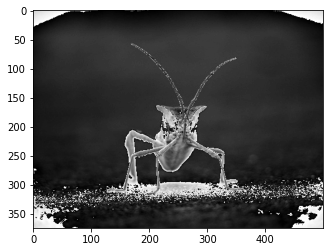

In [77]:
img=bitplane_MSB("/content/drive/MyDrive/s22022_hw1/stinkbug.png")


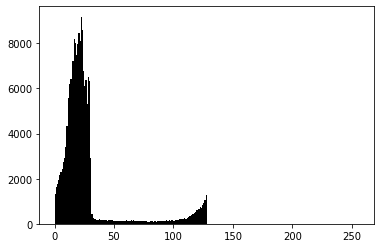

In [63]:
plt.hist(img.ravel(),256,[0,256],color='black')
plt.show()

In [ ]:
''' 
It is observed from the above histogram that the image is shifted towards at the extereme left which  tells about the greater darkness of the pixels in the image.
wherease we also observed that histogram has the last value till 127 about x-axis which tells that there "No" pixel of the 8 bit all are of maximum of the 7 bit.  

'''

#### 3. What can you say about the histogram of a resulting image if we keep the LSB bits in the bitplane to 0? Plot and Observe?

In [67]:
def bitplane_LSB (path):
  img = cv2.imread(path,0)
  # img = np.array(Image.open(path))
  lst = []
  decimal=[]
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j] ,width=8))

  for i in lst:
    decimal.append(int(i[0])*128 +int(i[1])*64 +int(i[2])*32+int(i[3])*16+int(i[4])*8+int(i[5])*4+ int(i[6])*2+int(i[7])*0)
  bit_img=np.array(decimal,dtype = np.uint8).reshape(img.shape[0],img.shape[1])
  plt.imshow(bit_img,cmap='gray')
  
  return bit_img

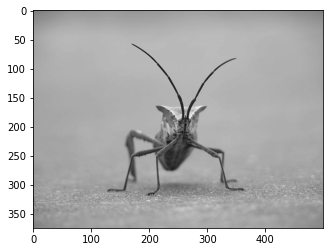

In [78]:
img=bitplane_LSB("/content/drive/MyDrive/s22022_hw1/stinkbug.png")

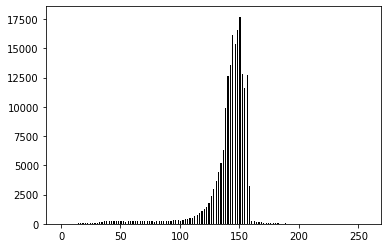

In [69]:
plt.hist(img.ravel(),256,[0,256],color='black')
plt.show()

In [76]:
'''
It is observed from the above histogram that  there is sudden gap at the intervals this is because of the removal of the LSB bit, which add 1 and makes up all the odd number from the 0~ 255 range
and which further helps to smoothen the curve and aslo smoothen the intensity in the images.  
'''
  

'\nIt is observed from the above histogram that  there is sudden gap at the intervals this is because of the removal of the LSB bit, which add 1 and makes up all the odd number from the 0~ 255 range\nand which further helps to smoothen the curve and aslo smoothen the intensity in the images.  \n'

#### 4. Transmission is usually achieved through packets containing a start bit, a byte of information and a stop bit. Baud rate is a common measure for digital data transmission and is defined as number of bits transmitted per second. How much time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over a 56K baud link? Similarly, calculate the time required to transmit the same image over a 3000K baud link

In [72]:
'''
Ans. 4. Consider the above given problem:
We need to transmit the image of shape (512,512,1) with channel intensity needs 8 bites to get the value from 0~255 value.

Therefore, Total size of the image = no. of rows*no. of columns* bit needed to represent the instensity
                                   = 512*512*8
                                   = 20917152 bites
       Total length of the packet = size of the image + start bit + end bit
                                  = 20917152+1+1
                                  = 20917154 bites 

Now, 
    the packet has to transfered over the Baudlink of 56K 
    Time taken to transfer the packet = 20917154/56000
                                      = 37.45 Sec
    
    the packet has to transfered over the Baudlink of 3000K 
    Time taken to transfer the packet = 20917154/3000000
                                      = 0.6990 Sec


'''
a=2097154/56000
print("Time Taken to transmit an image "+str(a)+" sec")
b=2097154/3000000
print("Time Taken to transmit an image "+str(b)+" sec")

Time Taken to transmit an image 37.44917857142857 sec
Time Taken to transmit an image 0.6990513333333334 sec


# Problem 3: Point Operations

#### 1. Write a function to create the negative of an image.

##### Ans 1.

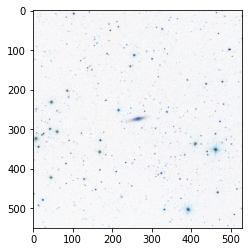

In [ ]:
def negative_image(path):
  img = np.array(Image.open(path))
  img.setflags(write=1)
  img[:,:,0]=255-img[:,:,0]
  img[:,:,1]=255-img[:,:,1]
  img[:,:,2]=255-img[:,:,2]

  return img

imgplot = plt.imshow(negative_image("/content/drive/MyDrive/s22022_hw1/x3Lkg.png"))